In [35]:
import pandas as pd
import numpy as np
import gensim
import string
import re
import nltk

from nltk.tokenize import word_tokenize
from gensim import corpora
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cinna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cinna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
df = pd.read_csv("C:\\Users\\cinna\\Desktop\\progetto_TA\\Data\\resampled_data_for_tf_idf.csv", skipinitialspace=True)

In [37]:
df

,lemmatized_stanzas,label
0,"['crumble', 'into', 'the', 'corner', 'make', '...",anger
1,"['you', 'be', 'hot', 'then', 'you', 'be', 'col...",anger
2,"['I', 'be', 'bear', 'the', 'run', 'kind', 'lea...",anger
3,"['but', 'life', ""'s"", 'like', 'poetry', 'and',...",anger
4,"['you', 'hit', 'I', 'up', 'like', 'hey', 'I', ...",anger
...,...,...
27099,"['to', 'be', 'honest', 'with', 'you', 'I', 'ha...",trust
27100,"['2', 'you', 'call', 'my', 'name', 'and', 'I',...",trust
27101,"['boomerang', 'boomerang', 'kangaroo', 'tail',...",trust
27102,"['wander', 'alone', 'drink', 'a', 'little', 'w...",trust


In [38]:
# Defining the stopwords
stopwords = nltk.corpus.stopwords.words('english') # Set di NLTK

# Creation of an ad-hoc list of stopwords, inserting algo the numbers spelled out
stopwords_adhoc = ['?','(', ')', '.', '[', ']','!', '...',
';',"\`","\'",'\"' , " ", "``", "\"\"", "\'\'", "``", "\'\'" "\'s", "\'ll", "ca", "n\'t", "\'m", "\'re", "\'ve", "na", "wan", "one", "two", "three", "four", "five", 
"six","seven", "eight", "nine", "ten", "zero", "cos", "er", "mow", "go", "get", "oh", "love", "know", "like", "see", "make", "come", "let", "say", "take",
"want", "would"]

# Generic punctuation
punctuation = set(string.punctuation)

# Expanding the original stopwords list
stopwords.extend(stopwords_adhoc)
stopwords.extend(punctuation)

#### Come suggerito dalla professoressa, rimuoviamo ulteriore rumore dai testi: stringhe vuote, numeri, apostrofi, virgolette, espressioni del tipo can't 

In [39]:
# Defining a function for cleaning the data
def cleaning(data):
    # Deleting punctuations and \d, alias each number
    data_strip = data.apply(lambda x: re.sub(r"[',\[\]’\d]|(o+\s*h+|h+\s*o+)]", "", x).strip()) 

    # Transforming the data into a list to handle them better
    data = list(data_strip)

    # Deleting the tokens in the stopwords list
    data_cleaned = [
    [word for word in word_tokenize(document.lower()) if word not in stopwords]
    for document in data ]

    # Visualizing the first five instances of the cleaned data-> commented because not necessary 
    # print("First five instances of the cleaned data: \n", data_cleaned[:5])
    return data_cleaned


In [40]:
# Function to create the correct formats for gensim-> I used scikit learn as per the suggestion made by the prof, to use min_df e max_df 

def formats(data):
    # Creating a dictionary on which the model can be based
    dictionary = corpora.Dictionary(data)
    print(dictionary)

    # Taking the id of each word
    dictionary.token2id

    # Transforming the corpus
    corpus = [dictionary.doc2bow(text) for text in data]

    # Visualizin the BOW
    '''for i, doc in enumerate(corpus):
        print("document:\t", data[i])
        print("Bag-of-words:\t", [(dictionary[_id], freq) for _id, freq in doc])
        print()'''

    # Space vector
    word_doc_matrix = gensim.matutils.corpus2dense(corpus, num_terms = len(dictionary))
    word_doc_matrix.shape
    return dictionary, corpus, word_doc_matrix

In [41]:
# Function to compute chi2 and tf-idf
def tf_idf(corpus):

    # Initializing the vectorizer
    vectorizer = TfidfVectorizer(min_df=0.02, max_df=0.8)

    # Fitting
    corpus_tfidf = vectorizer.fit_transform(corpus)
    
    # Creating an array of feature names
    feature_names = np.array(vectorizer.get_feature_names_out())

    # Finding the averages of tfidf in the documents
    tfidf_means = corpus_tfidf.mean(axis=0).A1

    # Coupling weight and feature
    feature_weights = dict(zip(feature_names, tfidf_means))

    # Putting in order the features
    ordered_features = dict(sorted(feature_weights.items(), key=lambda x: x[1], reverse=True))

    # List of features 
    list = []

    #Stamparle in ordine
    for feature, weight in ordered_features.items():
        list.append(f"{feature}: {weight}")

    print(list[:5])

    return

In [42]:
def select_emotion(dataframe, emotion):
    canzoni_emotion = dataframe[dataframe["label"] == emotion]["canzoni_cleaned"].apply(lambda x: " ".join(x))

    return canzoni_emotion

In [44]:
df["canzoni_cleaned"] = cleaning(df["lemmatized_stanzas"])

### TfIdf for Anger

In [45]:
canzoni_anger = select_emotion(df, emotion = "anger")

In [46]:
tf_idf(canzoni_anger)

['never: 0.03915730899141047', 'time: 0.0379514503133797', 'way: 0.034824142004891395', 'day: 0.031495477407479364', 'back: 0.031271287370975974']


### Tf-Idf for Anticipation

In [47]:
canzoni_anticipation = select_emotion(df, emotion = "anticipation")

In [48]:
tf_idf(canzoni_anticipation)

['time: 0.03924125007816359', 'never: 0.03478213484110286', 'feel: 0.033766074609785236', 'think: 0.0314816613208319', 'heart: 0.03094102001558523']


### TfIdf for Disgust

In [49]:
canzoni_disgust = select_emotion(df, emotion = "disgust")

In [50]:
tf_idf(canzoni_disgust)

['time: 0.03872651638086297', 'feel: 0.03626485266234802', 'heart: 0.031050196745866027', 'think: 0.030446218166038572', 'baby: 0.03038309588580218']


### Tf_Idf for Fear

In [51]:
canzoni_fear = select_emotion(df, emotion = "fear")

In [52]:
tf_idf(canzoni_fear)

['time: 0.04438673790620864', 'yeah: 0.03873958714712372', 'tell: 0.034203094612624725', 'well: 0.034182279605330684', 'think: 0.030908904306291306']


### Tf-Idf for Joy

In [53]:
canzoni_joy = select_emotion(df, emotion = "joy")

In [54]:
tf_idf(canzoni_joy)

['time: 0.03654156466530168', 'never: 0.03393851495554344', 'yeah: 0.03219673942911873', 'feel: 0.03052676272822113', 'way: 0.028550268420330555']


### Tf-Idf for Sadness

In [55]:
canzoni_sadness = select_emotion(df, emotion = "sadness")

In [56]:
tf_idf(canzoni_sadness)

['time: 0.04367511219131114', 'feel: 0.03724794139238762', 'never: 0.032927524207345134', 'back: 0.031088001694883564', 'heart: 0.030946592818153974']


### Tf_Idf for Surprise

In [57]:
canzoni_surprise = select_emotion(df, emotion = "surprise")

In [58]:
tf_idf(canzoni_surprise)

['time: 0.04041516627948955', 'never: 0.03197600452530763', 'yeah: 0.029559824018096228', 'leave: 0.029015100953756787', 'tell: 0.028716095725039314']


### Tf-Idf for Trust

In [59]:
canzoni_trust = select_emotion(df, emotion = "surprise")

In [60]:
tf_idf(canzoni_trust)

['time: 0.04041516627948955', 'never: 0.03197600452530763', 'yeah: 0.029559824018096228', 'leave: 0.029015100953756787', 'tell: 0.028716095725039314']


## Training of the model with feature selection

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

In [78]:
pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=2, max_df=0.8)),
    ('sel', SelectKBest(chi2, k = 5000)),
    ('tfidf', TfidfTransformer()),
    ('learner', RandomForestClassifier(max_depth=10))
])

In [79]:
X = df['canzoni_cleaned'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
y = df['label']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

pandas.core.series.Series

In [81]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [84]:
print('Classification report:')
print(classification_report(y_test, y_pred))
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

Classification report:
              precision    recall  f1-score   support

       anger       0.21      0.28      0.24      1004
anticipation       0.20      0.14      0.17      1023
     disgust       0.22      0.15      0.18      1030
        fear       0.19      0.25      0.21      1001
         joy       0.15      0.30      0.20      1016
     sadness       0.21      0.14      0.17      1018
    surprise       0.20      0.07      0.10      1036
       trust       0.18      0.17      0.17      1004

    accuracy                           0.19      8132
   macro avg       0.19      0.19      0.18      8132
weighted avg       0.19      0.19      0.18      8132

Confusion matrix:
[[277  66  83 136 234  58  48 102]
 [124 148  92 155 244 108  34 118]
 [155  80 152 143 273  64  34 129]
 [147  86  60 248 243  79  44  94]
 [168  81  89 150 304  80  36 108]
 [134  94  65 165 242 144  43 131]
 [153  83  65 173 317  77  70  98]
 [158  98  88 140 235  85  33 167]]


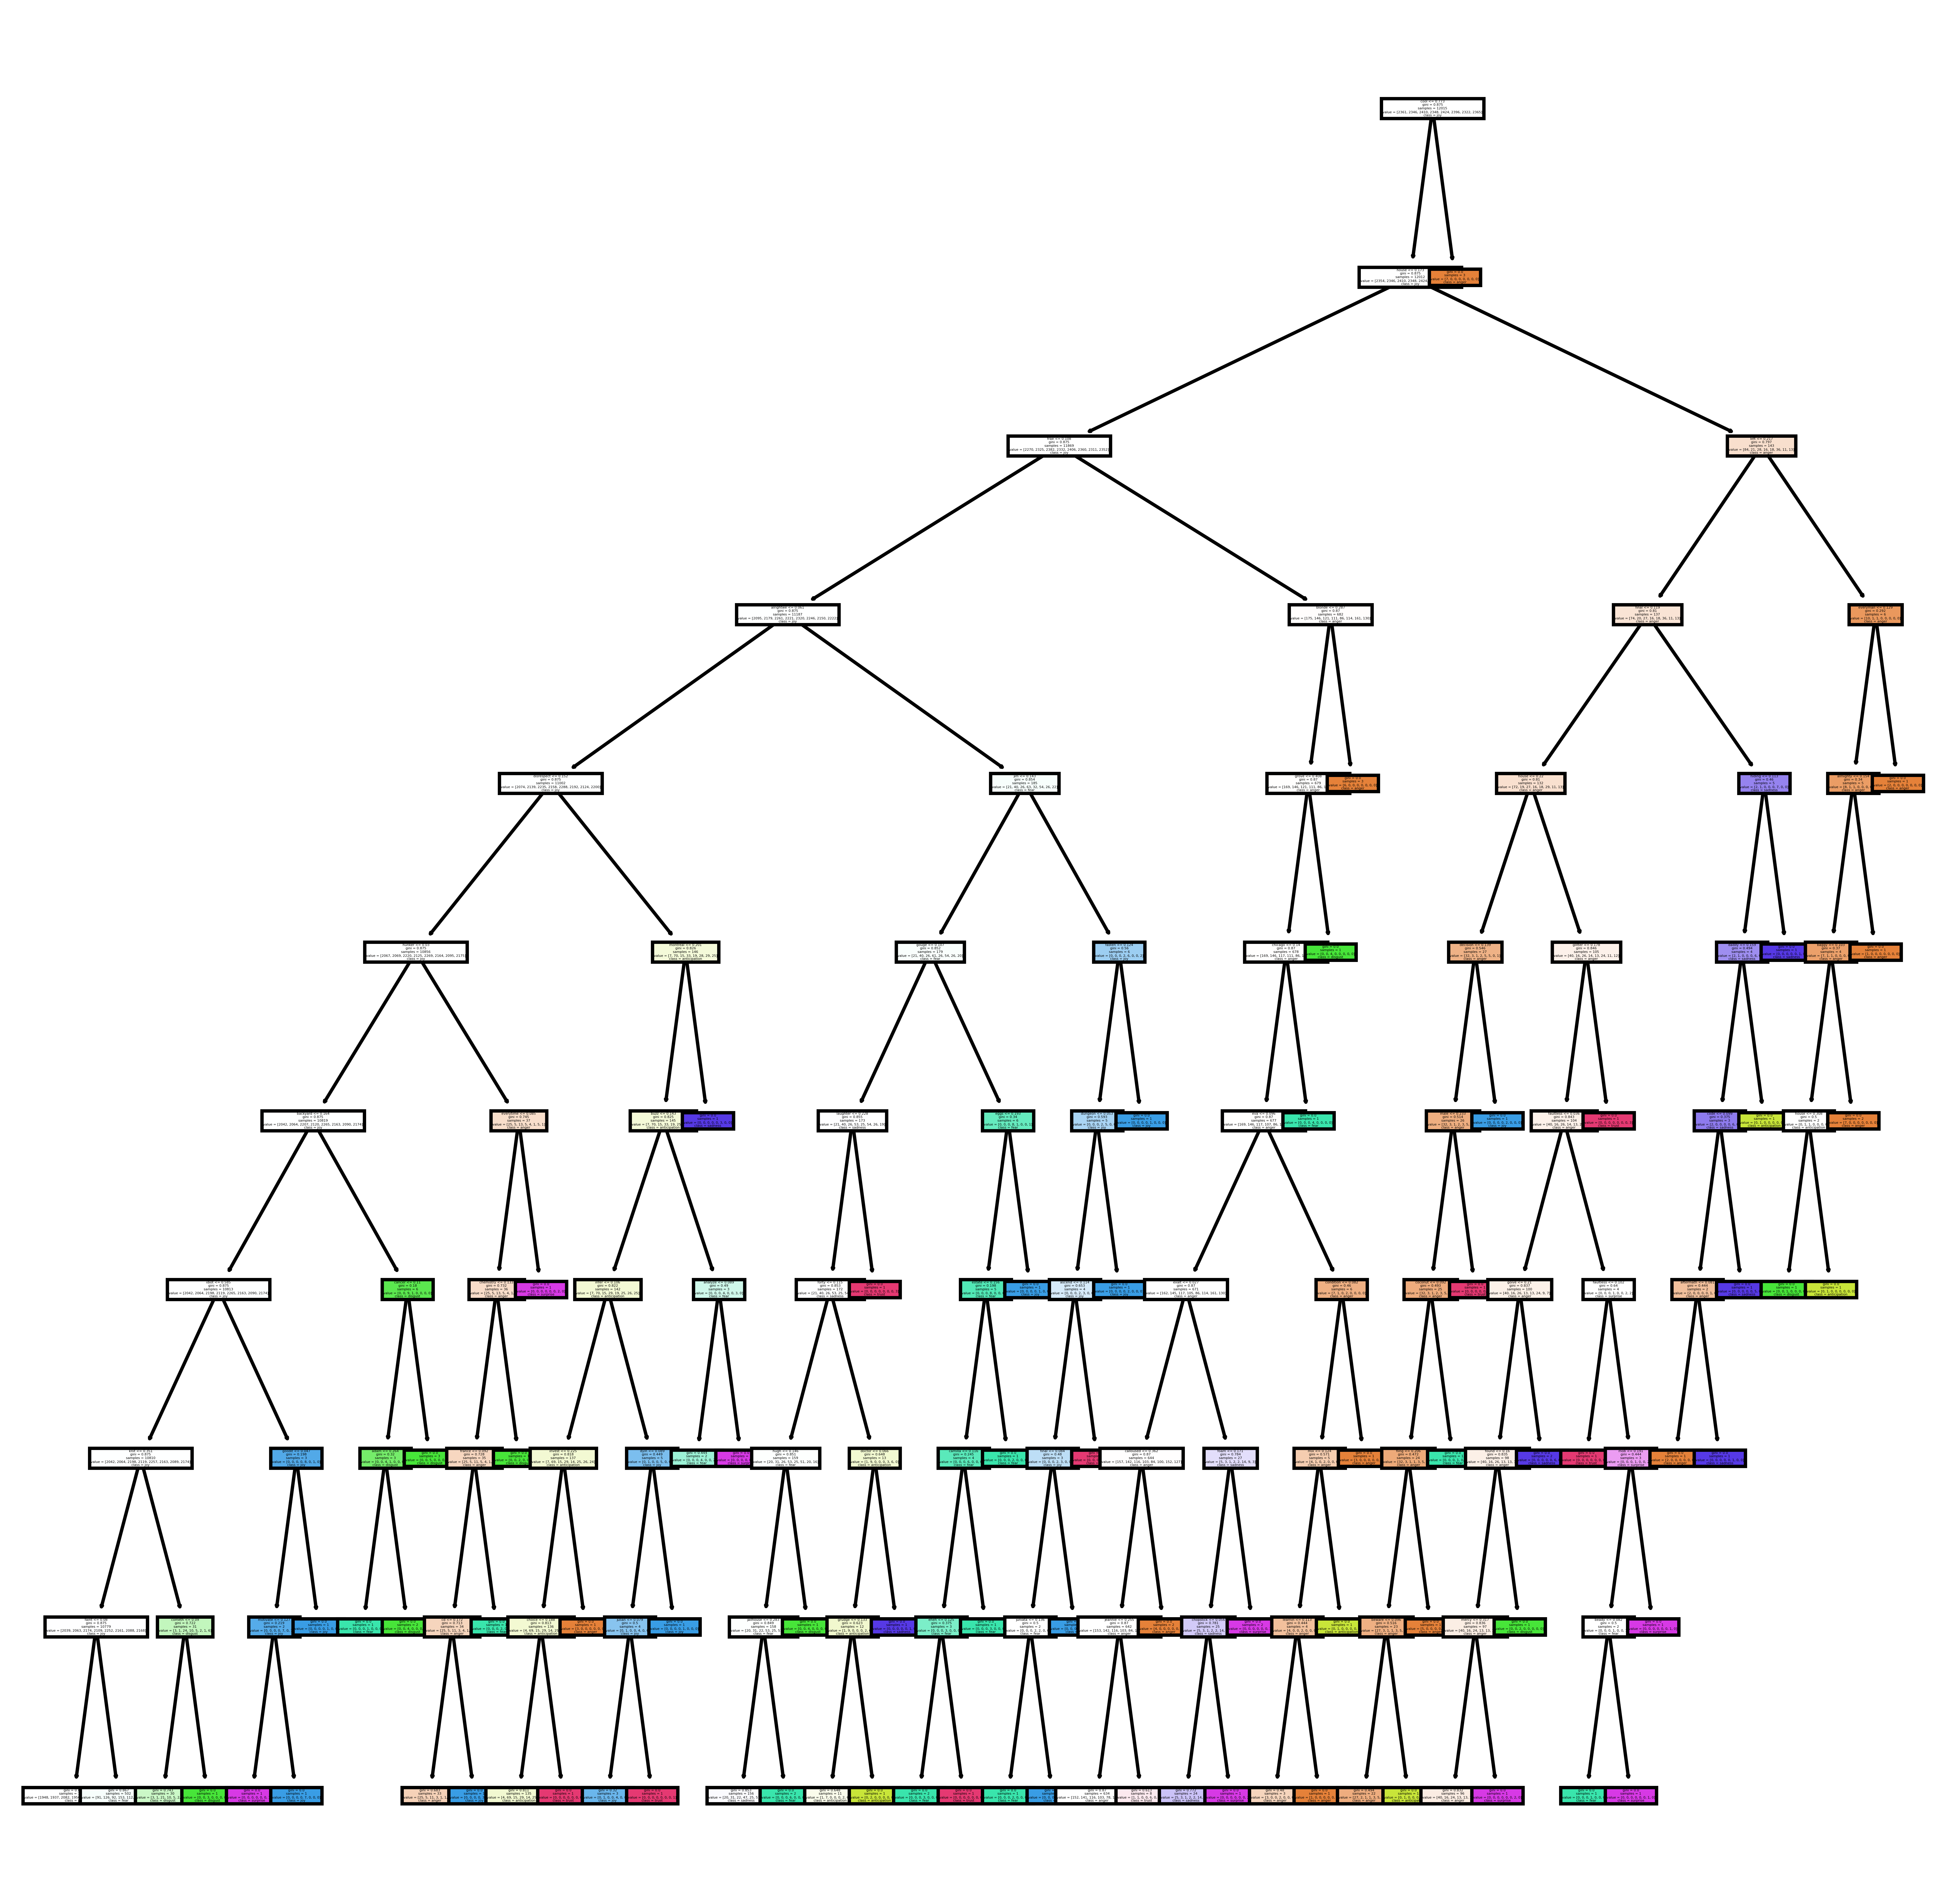

In [83]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extracting feature names
vectorizer = pipeline.named_steps['vect']
fn = vectorizer.get_feature_names_out()

# Defining the names of the classes
cn = pipeline.named_steps['learner'].classes_

# Accessing the first tree of the forest
single_tree = pipeline.named_steps['learner'].estimators_[0]

# Plotting the tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10), dpi=800)
plot_tree(single_tree,
          feature_names=fn, 
          class_names=cn.astype(str),
          filled=True)
plt.show()
